In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install mplfinance
import mplfinance as mpf


In [ ]:
import os

# Specify the directory where you want to start the search
# This example uses the user's home directory
home_directory = os.path.expanduser("~")

# Recursively search for all Jupyter notebooks (.ipynb) files
notebook_paths = []
for root, dirs, files in os.walk(home_directory):
    for file in files:
        if file.endswith(".ipynb"):
            notebook_paths.append(os.path.join(root, file))

# Display the results
if notebook_paths:
    print(f"Found {len(notebook_paths)} Jupyter notebooks:")
    for notebook in notebook_paths:
        print(notebook)
else:
    print("No Jupyter notebooks found.")


No Jupyter notebooks found.


In [ ]:
path = '/content/drive/MyDrive/Data Science/Capstone Project/data/EURUSD_M1 (1).csv'
data = pd.read_csv(path)

In [ ]:
data

,2024-05-03 20:29,1.07654,1.07657,1.0765,1.07656,96
0,2024-05-03 20:30,1.07654,1.07654,1.07648,1.07648,65
1,2024-05-03 20:31,1.07648,1.07651,1.07647,1.07649,95
2,2024-05-03 20:32,1.07650,1.07653,1.07640,1.07640,111
3,2024-05-03 20:33,1.07641,1.07641,1.07639,1.07639,52
4,2024-05-03 20:34,1.07639,1.07640,1.07639,1.07639,135
...,...,...,...,...,...,...
99994,2024-08-09 20:55,1.09158,1.09158,1.09156,1.09157,50
99995,2024-08-09 20:56,1.09157,1.09159,1.09155,1.09156,64
99996,2024-08-09 20:57,1.09157,1.09158,1.09156,1.09156,43
99997,2024-08-09 20:58,1.09156,1.09159,1.09155,1.09157,24


In [ ]:
new_columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Spread']

In [ ]:
data.columns = new_columns

In [ ]:
data.head()

,Time,Open,High,Low,Close,Spread
0,2024-05-03 20:30,1.07654,1.07654,1.07648,1.07648,65
1,2024-05-03 20:31,1.07648,1.07651,1.07647,1.07649,95
2,2024-05-03 20:32,1.07650,1.07653,1.07640,1.07640,111
3,2024-05-03 20:33,1.07641,1.07641,1.07639,1.07639,52
4,2024-05-03 20:34,1.07639,1.07640,1.07639,1.07639,135


In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data


,Time,Open,High,Low,Close,Spread
0,2024-05-03 20:30:00,1.07654,1.07654,1.07648,1.07648,65
1,2024-05-03 20:31:00,1.07648,1.07651,1.07647,1.07649,95
2,2024-05-03 20:32:00,1.07650,1.07653,1.07640,1.07640,111
3,2024-05-03 20:33:00,1.07641,1.07641,1.07639,1.07639,52
4,2024-05-03 20:34:00,1.07639,1.07640,1.07639,1.07639,135
...,...,...,...,...,...,...
99994,2024-08-09 20:55:00,1.09158,1.09158,1.09156,1.09157,50
99995,2024-08-09 20:56:00,1.09157,1.09159,1.09155,1.09156,64
99996,2024-08-09 20:57:00,1.09157,1.09158,1.09156,1.09156,43
99997,2024-08-09 20:58:00,1.09156,1.09159,1.09155,1.09157,24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    99999 non-null  datetime64[ns]
 1   Open    99999 non-null  float64       
 2   High    99999 non-null  float64       
 3   Low     99999 non-null  float64       
 4   Close   99999 non-null  float64       
 5   Spread  99999 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.6 MB


In [ ]:
data.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Spread'], dtype='object')

In [ ]:
data.describe()

,Time,Open,High,Low,Close,Spread
count,99999,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,2024-06-22 21:58:02.284222976,1.081972,1.082020,1.081924,1.081972,136.335653
min,2024-05-03 20:30:00,1.066710,1.066820,1.066600,1.066700,1.000000
25%,2024-05-29 09:29:30,1.076170,1.076220,1.076120,1.076170,41.000000
50%,2024-06-23 21:59:00,1.082700,1.082750,1.082660,1.082700,92.000000
75%,2024-07-17 10:49:30,1.087300,1.087340,1.087260,1.087300,175.000000
max,2024-08-09 20:59:00,1.100710,1.100880,1.100230,1.100720,2174.000000
std,NaN,0.006900,0.006903,0.006898,0.006900,154.183362


In [ ]:
min_date = data['Time'].min()
max_date = data['Time'].max()

print(f"The data ranges from {min_date} to {max_date}.")

The data ranges from 2024-05-03 20:30:00 to 2024-08-09 20:59:00.


In [ ]:
data.isnull().sum()

,0
Time,0
Open,0
High,0
Low,0
Close,0
Spread,0


# **Exploratory Data Anaysis**

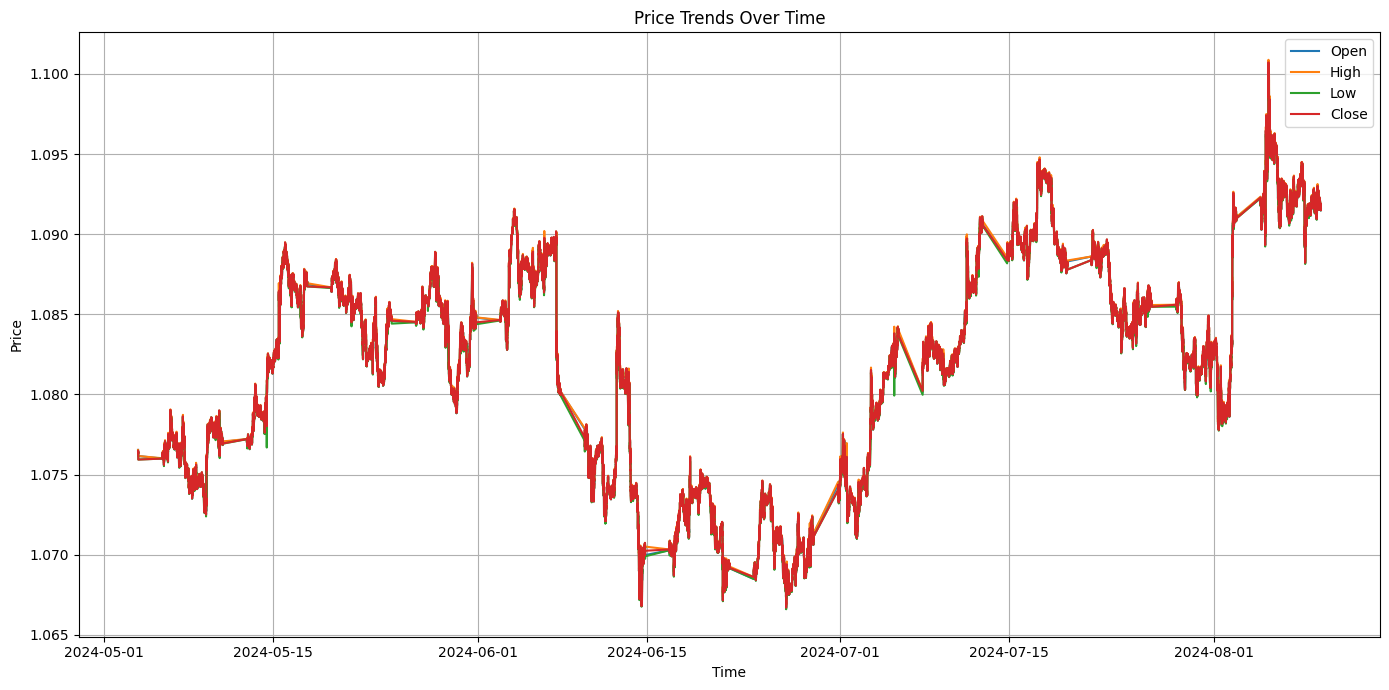

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Time'], data['Open'], label='Open')
plt.plot(data['Time'], data['High'], label='High')
plt.plot(data['Time'], data['Low'], label='Low')
plt.plot(data['Time'], data['Close'], label='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.grid(True)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


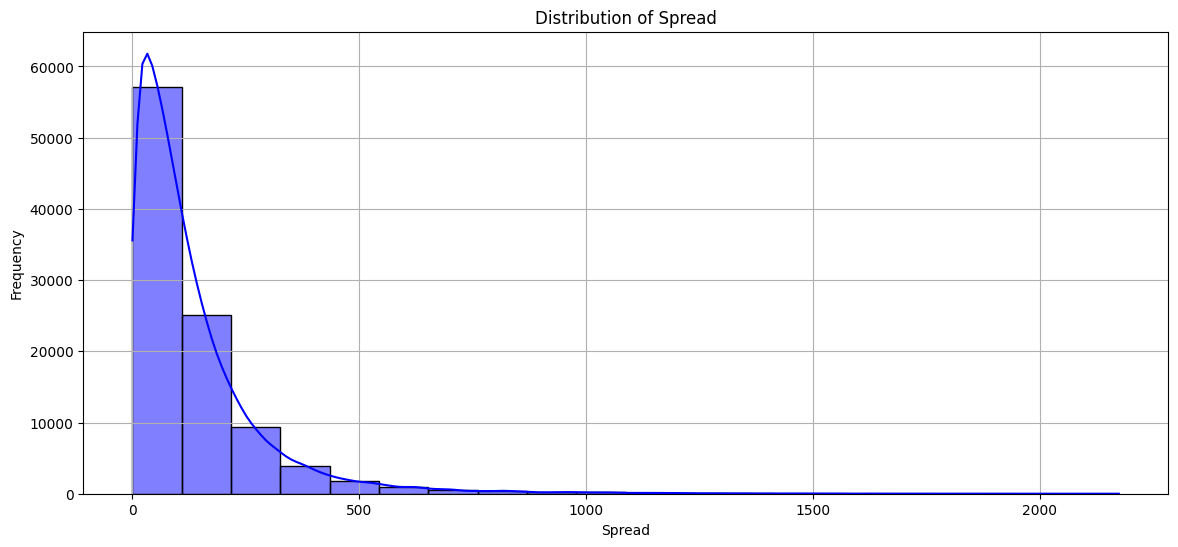

In [ ]:
plt.figure(figsize = (14,6))
sns.histplot(data['Spread'], bins = 20, kde = True, color = 'blue')
plt.xlabel('Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Spread')
plt.grid(True)
plt.show()

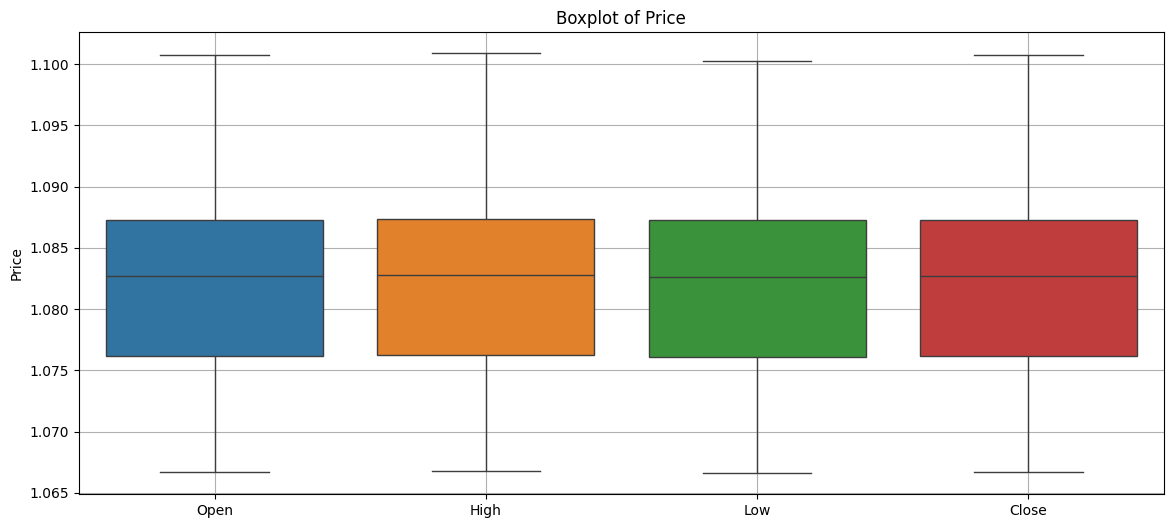

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data = data[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.grid(True)
plt.show()

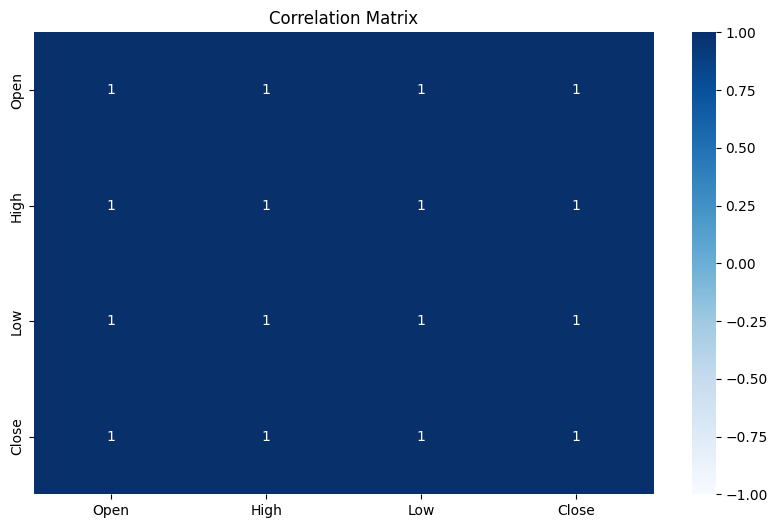

In [ ]:
corr = data[['Open', 'High', 'Low', 'Close']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

**Candlestick Chart**

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


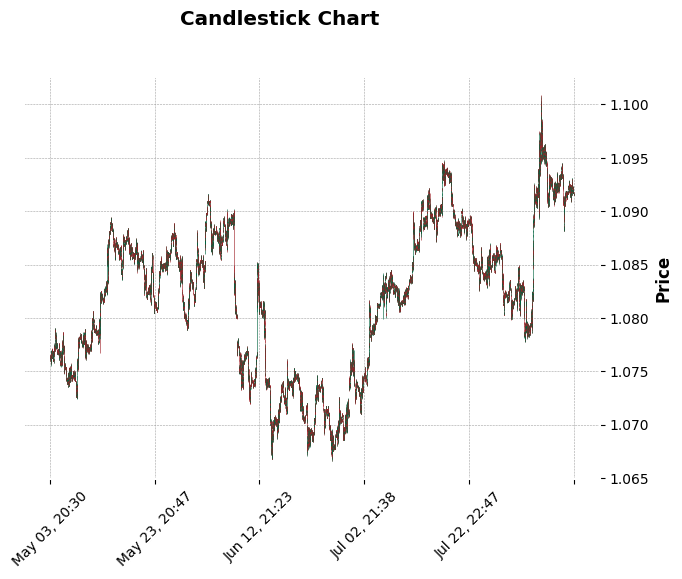

In [ ]:
import pandas as pd
import mplfinance as mpf

# Assuming 'Time' is the column in your DataFrame containing datetime information
data_candle = data[['Open', 'High', 'Low', 'Close']]
data_candle.set_index(pd.to_datetime(data['Time']), inplace=True)  # Set 'Time' column as index and convert to DatetimeIndex

# Plotting the candlestick chart
mpf.plot(data_candle, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')
plt.show()

**Moving Averages**

In [ ]:
data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-period Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-period Simple Moving Average

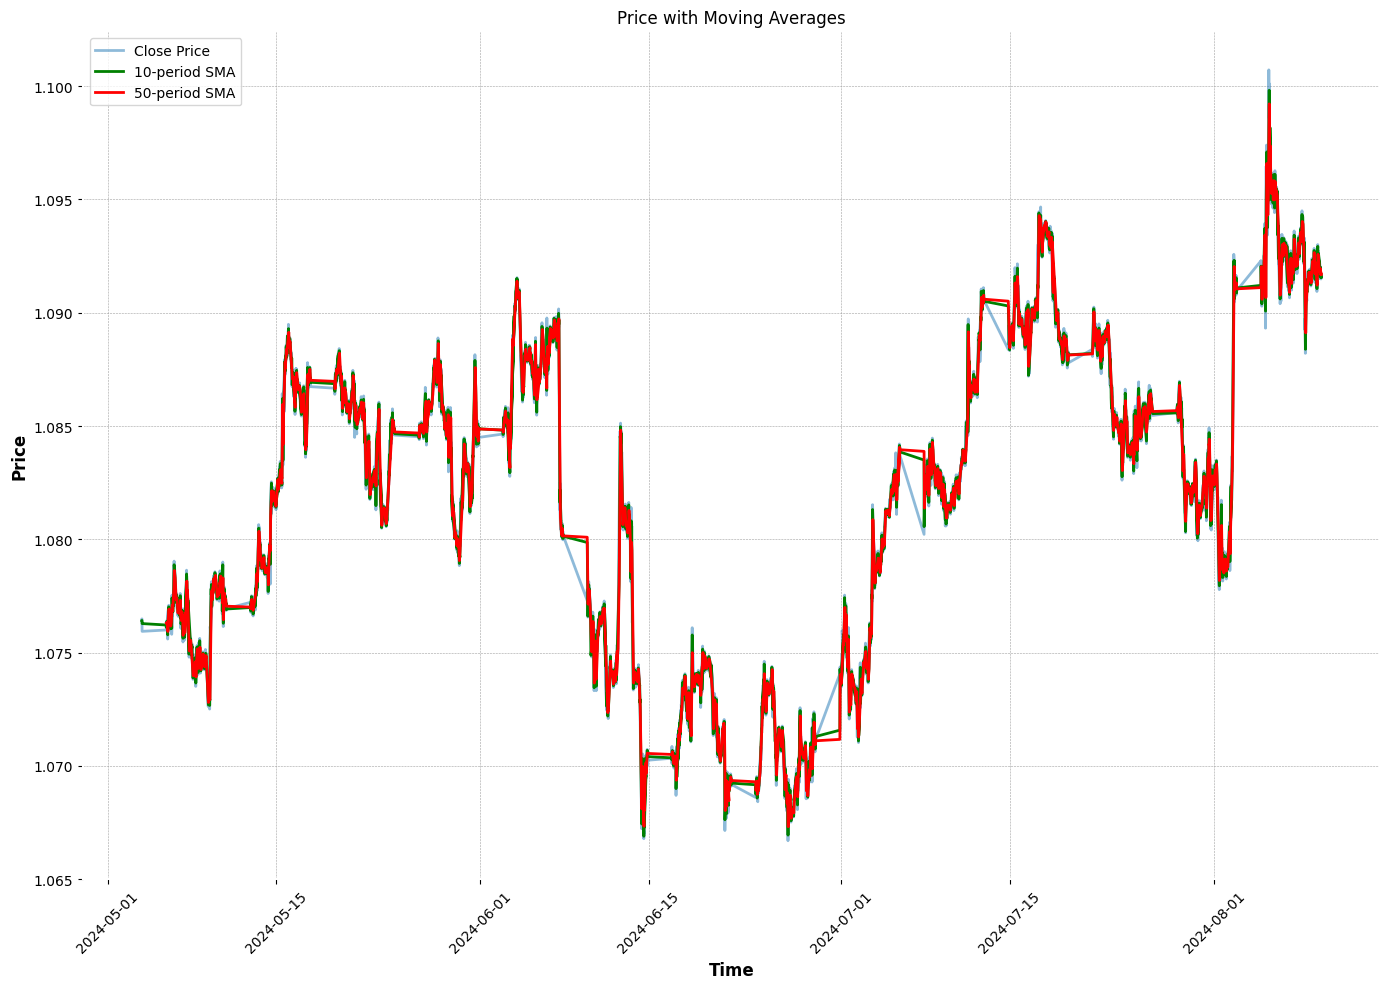

In [ ]:
# Make sure to run this cell first to create the 'SMA_10' column
data['SMA_10'] = data['Close'].rolling(window=10).mean()  # 10-period Simple Moving Average
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-period Simple Moving Average

# Then, you can run the plotting code
plt.figure(figsize=(14, 10))
plt.plot(data['Time'], data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Time'], data['SMA_10'], label='10-period SMA', color='green')
plt.plot(data['Time'], data['SMA_50'], label='50-period SMA', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Boillinger Bands**

In [ ]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['Upper_Band'] = data['SMA_20'] + 2*data['Close'].rolling(window=20).std()
data['Lower_Band'] = data['SMA_20'] - 2*data['Close'].rolling(window=20).std()

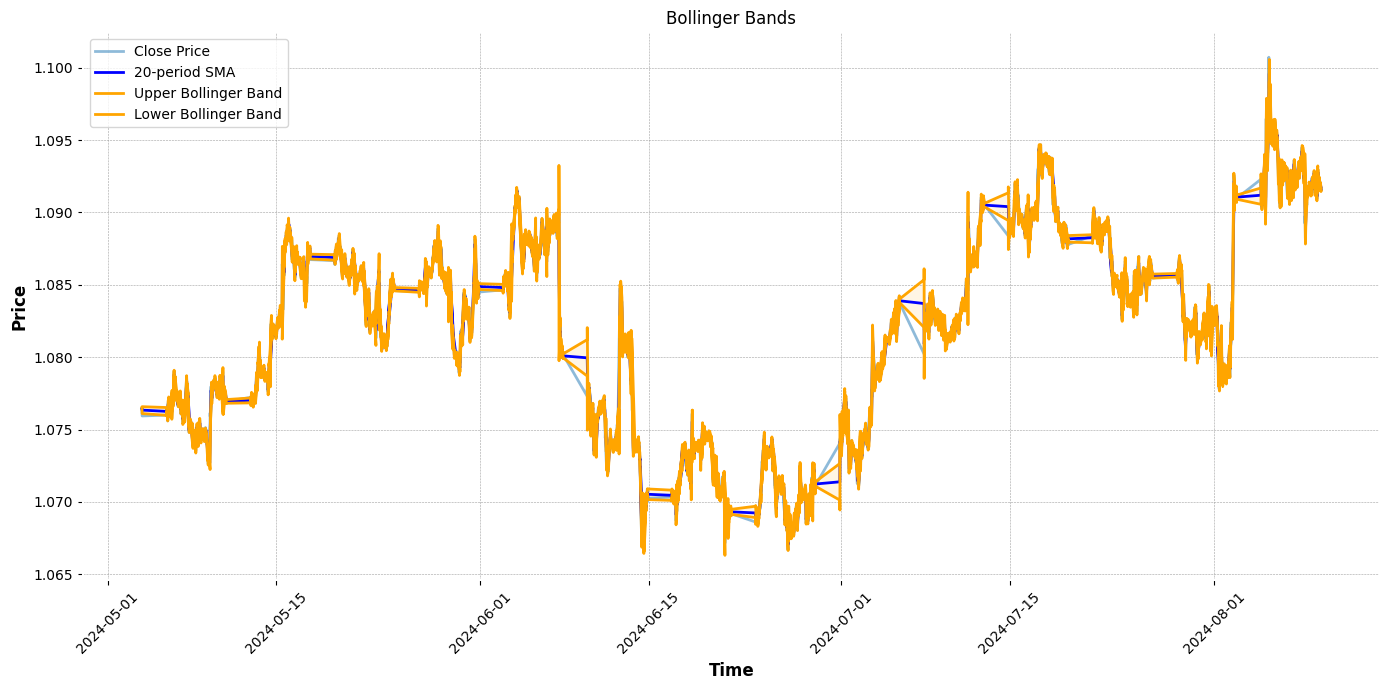

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Time'], data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Time'], data['SMA_20'], label='20-period SMA', color='blue')
plt.plot(data['Time'], data['Upper_Band'], label='Upper Bollinger Band', color='orange')
plt.plot(data['Time'], data['Lower_Band'], label='Lower Bollinger Band', color='orange')
plt.fill_between(data['Time'], data['Upper_Band'], data['Lower_Band'], color='orange', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Autocorrelation Plot**

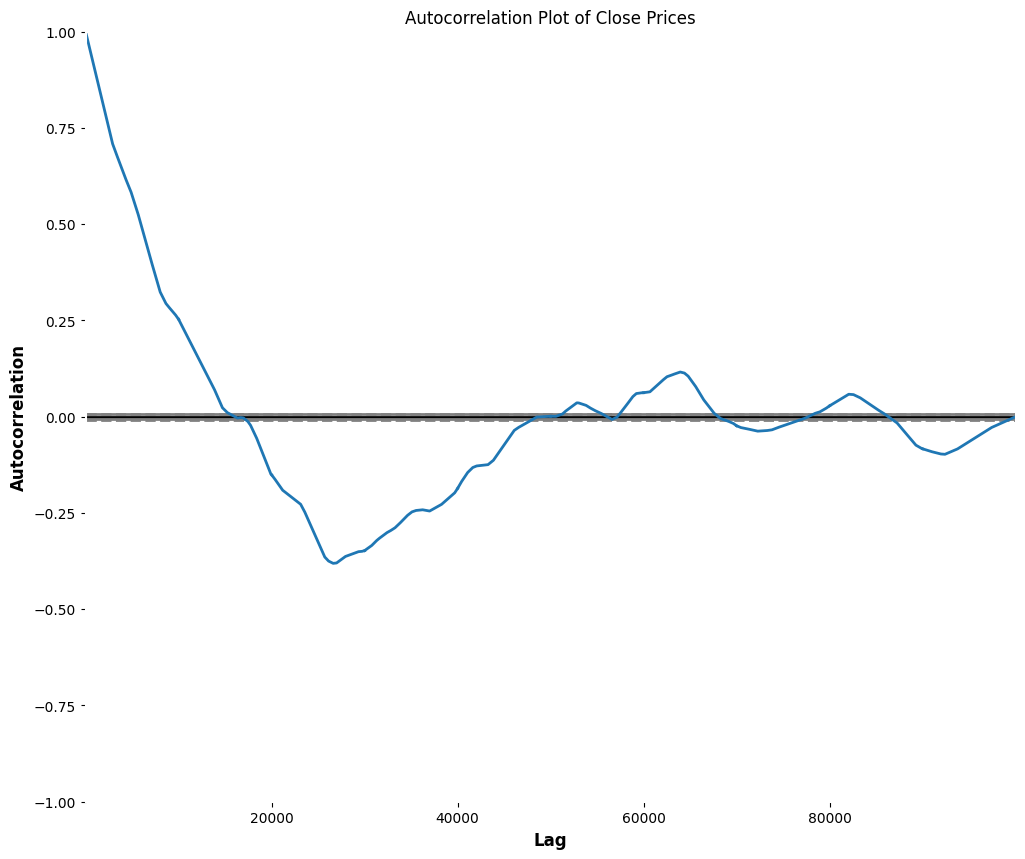

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 10))
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation Plot of Close Prices')
plt.show()

**Scatter Matrix**

<Figure size 1000x1000 with 0 Axes>

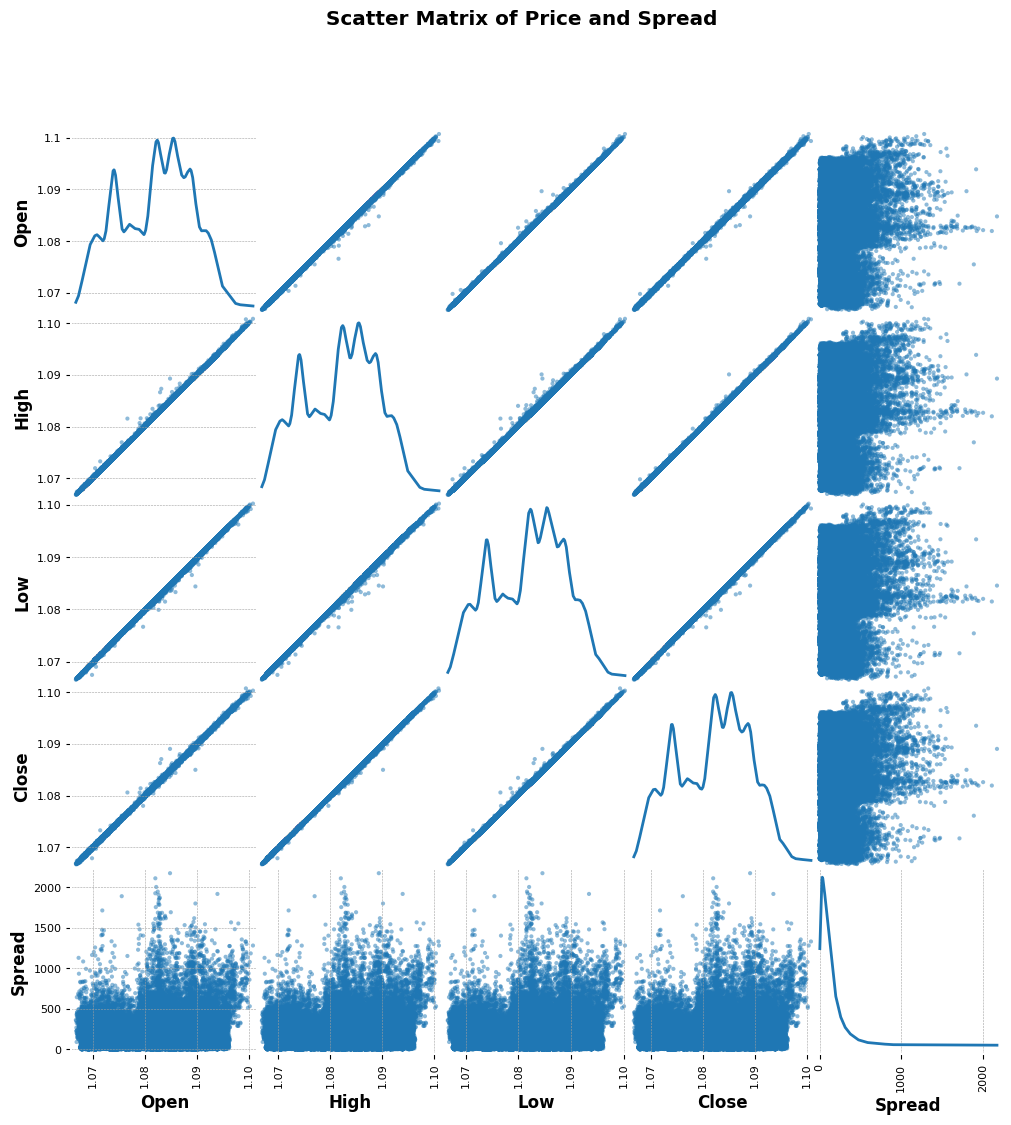

In [ ]:
from pandas.plotting import scatter_matrix

plt.figure(figsize=(10, 10))
scatter_matrix(data[['Open', 'High', 'Low', 'Close', 'Spread']], diagonal='kde', figsize=(12, 12))
plt.suptitle('Scatter Matrix of Price and Spread')
plt.show()

**Violin Plot for Spread**

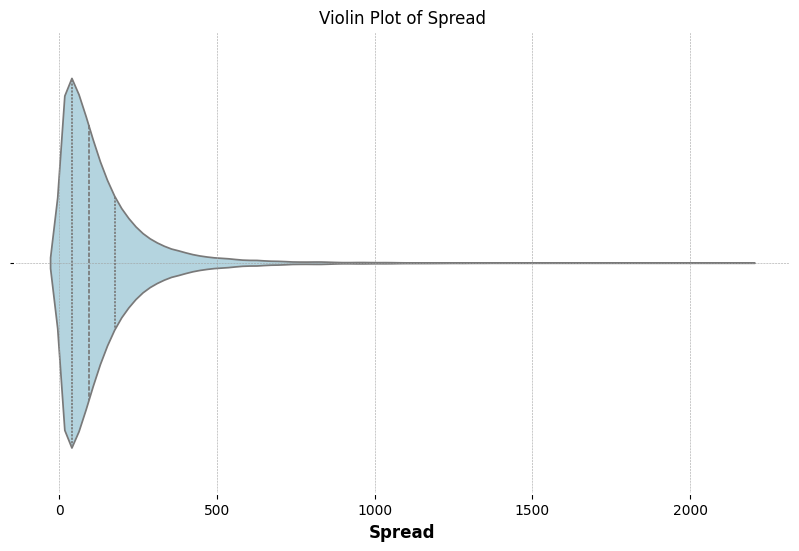

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Spread', data=data, inner='quartile', color='lightblue')
plt.title('Violin Plot of Spread')
plt.xlabel('Spread')
plt.grid(True)
plt.show()

**Heatmap of Price Changes**

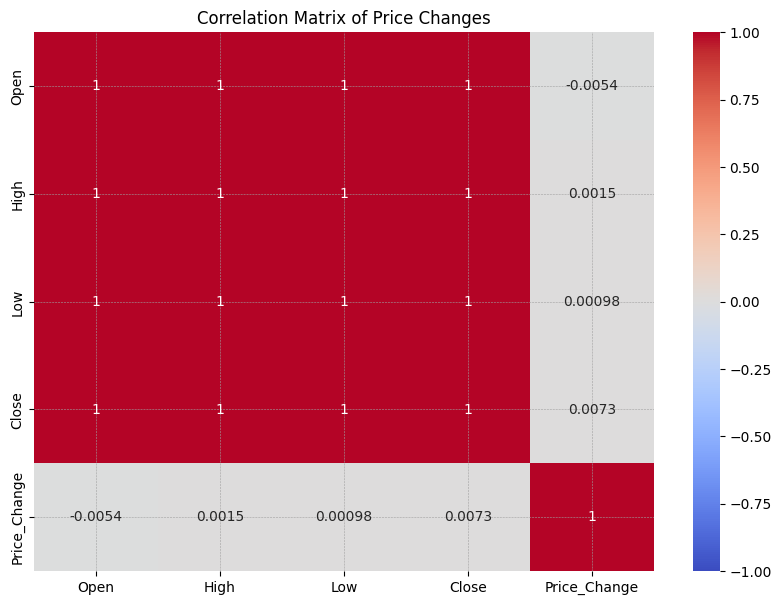

In [ ]:
# Calculate price changes
data['Price_Change'] = data['Close'].diff()
# Correlation matrix of price changes
corr_price_changes = data[['Open', 'High', 'Low', 'Close', 'Price_Change']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_price_changes, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Price Changes')
plt.show()


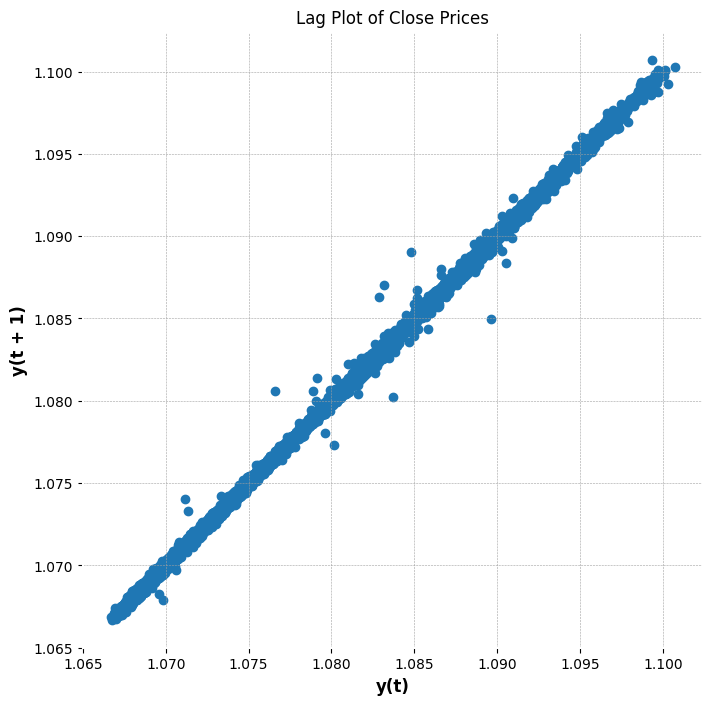

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize=(8, 8))
lag_plot(data['Close'], lag=1)
plt.title('Lag Plot of Close Prices')
plt.show()

# **Trend and Seasonality Analysis**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Set the 'Time' column as the index
data.set_index('Time', inplace=True)

In [ ]:
# Decompose the 'Close' price time series
decomposition = seasonal_decompose(data['Close'], model='additive', period=24)

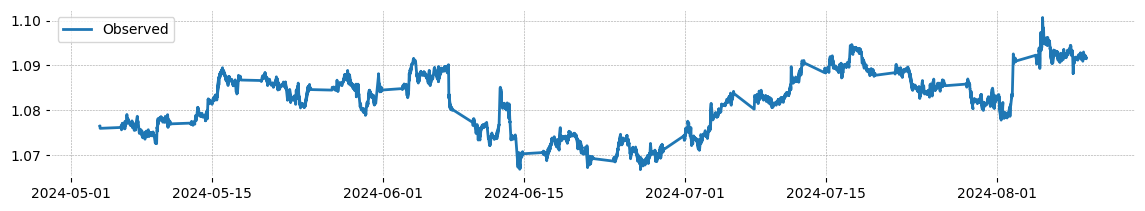

In [ ]:
# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.legend()
#plt.tight_layout()

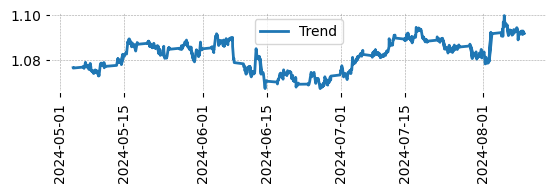

In [ ]:
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.xticks(rotation =90)
plt.show()

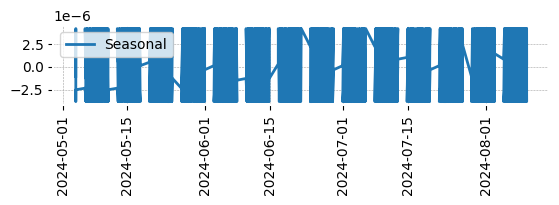

In [ ]:
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.xticks(rotation =90)
plt.show()

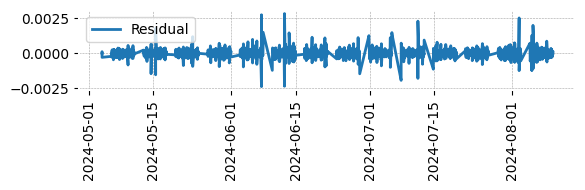

In [ ]:
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.xticks(rotation =90)
plt.show()

In [ ]:
data.head()
#data.columns

,Open,High,Low,Close,Spread,SMA_10,SMA_50,SMA_20,Upper_Band,Lower_Band,Price_Change
Time,,,,,,,,,,,
2024-05-03 20:30:00,1.07654,1.07654,1.07648,1.07648,65,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03 20:31:00,1.07648,1.07651,1.07647,1.07649,95,NaN,NaN,NaN,NaN,NaN,0.00001
2024-05-03 20:32:00,1.07650,1.07653,1.07640,1.07640,111,NaN,NaN,NaN,NaN,NaN,-0.00009
2024-05-03 20:33:00,1.07641,1.07641,1.07639,1.07639,52,NaN,NaN,NaN,NaN,NaN,-0.00001
2024-05-03 20:34:00,1.07639,1.07640,1.07639,1.07639,135,NaN,NaN,NaN,NaN,NaN,0.00000


# **Feature Engineering**

In [ ]:
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


KeyError: 'Time'

In [ ]:
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute
data['Day_of_Week'] = data['Time'].dt.dayofweek
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Rolling_Mean_7'] = data['Close'].rolling(window=7).mean()
data['Rolling_Std_7'] = data['Close'].rolling(window=7).std()


KeyError: 'Time'

In [ ]:
data

,Open,High,Low,Close,Spread,SMA_10,SMA_50,SMA_20,Upper_Band,Lower_Band,Price_Change
Time,,,,,,,,,,,
2024-05-03 20:30:00,1.07654,1.07654,1.07648,1.07648,65,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03 20:31:00,1.07648,1.07651,1.07647,1.07649,95,NaN,NaN,NaN,NaN,NaN,0.00001
2024-05-03 20:32:00,1.07650,1.07653,1.07640,1.07640,111,NaN,NaN,NaN,NaN,NaN,-0.00009
2024-05-03 20:33:00,1.07641,1.07641,1.07639,1.07639,52,NaN,NaN,NaN,NaN,NaN,-0.00001
2024-05-03 20:34:00,1.07639,1.07640,1.07639,1.07639,135,NaN,NaN,NaN,NaN,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09 20:55:00,1.09158,1.09158,1.09156,1.09157,50,1.091571,1.091710,1.091633,1.091816,1.091449,-0.00001
2024-08-09 20:56:00,1.09157,1.09159,1.09155,1.09156,64,1.091564,1.091703,1.091620,1.091789,1.091452,-0.00001
2024-08-09 20:57:00,1.09157,1.09158,1.09156,1.09156,43,1.091558,1.091697,1.091611,1.091767,1.091454,0.00000


In [ ]:
data.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Spread', 'Year', 'Month',
       'Day', 'Hour', 'Minute', 'Day_of_Week', 'Lag_1', 'Lag_2',
       'Rolling_Mean_7', 'Rolling_Std_7', 'Price_Change', 'Volatility'],
      dtype='object')

In [ ]:
data['Price_Change'] = data['Close'].pct_change()
data['Volatility'] = data['Close'].rolling(window=7).std()

In [ ]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_20'] = data['Close'].ewm(span=20).mean()

# RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# **Model Buildin**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and it's already loaded

# Drop any rows with NaN values that were introduced during feature engineering
#df = df.dropna()

# Define features (X) and target (y)
features = ['Open', 'High', 'Low', 'Spread', 'Year', 'Month', 'Day', 'Hour', 'Minute',
            'Day_of_Week', 'Lag_1', 'Lag_2', 'Rolling_Mean_7', 'Rolling_Std_7',
            'Price_Change', 'Volatility', 'SMA_20', 'EMA_20', 'RSI']
X = data[features]
y = data['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['Year', 'Month', 'Day', 'Hour', 'Minute', 'Day_of_Week', 'Lag_1', 'Lag_2', 'Rolling_Mean_7', 'Rolling_Std_7', 'Price_Change', 'Volatility', 'SMA_20', 'EMA_20', 'RSI'] not in index"

In [ ]:
from sklearn.impute import SimpleImputer
# Handle NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of the column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")


Linear Regression Performance:
MAE: 4.828424332767922e-06
MSE: 7.129918828748304e-11
RMSE: 8.44388466805907e-06
R²: 0.9999985164075176


**Random Rorest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_model.predict(X_test)
# Evaluate the model
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")


Random Forest Performance:
MAE: 2.151707595843355e-05
MSE: 1.1025518168618208e-09
RMSE: 3.320469570500264e-05
R²: 0.9999770581176826


**LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape features for LSTM input [samples, timesteps, features]
# Removed .values since X_train is already a numpy array
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# Removed .values since X_test is already a numpy array
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate the model
print("LSTM Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lstm)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lstm)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lstm, squared=False)}")
print(f"R²: {r2_score(y_test, y_pred_lstm)}")



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0280
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 5.9020e-05
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.7304e-05
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.7090e-05
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 5.7917e-05
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.6334e-05
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.6325e-05
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.5954e-05
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 5.5032e-05
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 5.4086e-05
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Performance:
MAE: 0.005791579455215455
MSE: 4.9769314061334824e-05
RMSE: 0.007054736994483553
R²: -0.03559916981213873


# **Model Comparison**

In [ ]:
# Compile all predictions
predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'LSTM': y_pred_lstm.flatten()  # Flatten for compatibility
}

# Print performance metrics for comparison
for model_name, preds in predictions.items():
    print(f"{model_name} Performance:")
    #print(f"MAE: {mean_absolute_error(y_test, preds)}")
   # print(f"MSE: {mean_squared_error(y_test, preds)}")
   # print(f"RMSE: {mean_squared_error(y_test, preds, squared=False)}")
    print(f"R²: {r2_score(y_test, preds)}\n")


Linear Regression Performance:
R²: 0.9999999907318848

Random Forest Performance:


ValueError: Found input variables with inconsistent numbers of samples: [19996, 20000]

ValueError: x and y must be the same size

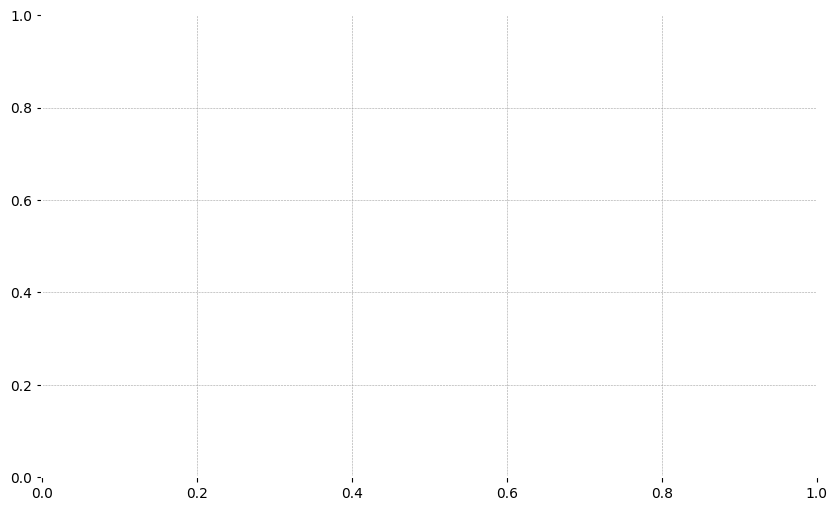

In [ ]:

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


ValueError: x and y must be the same size

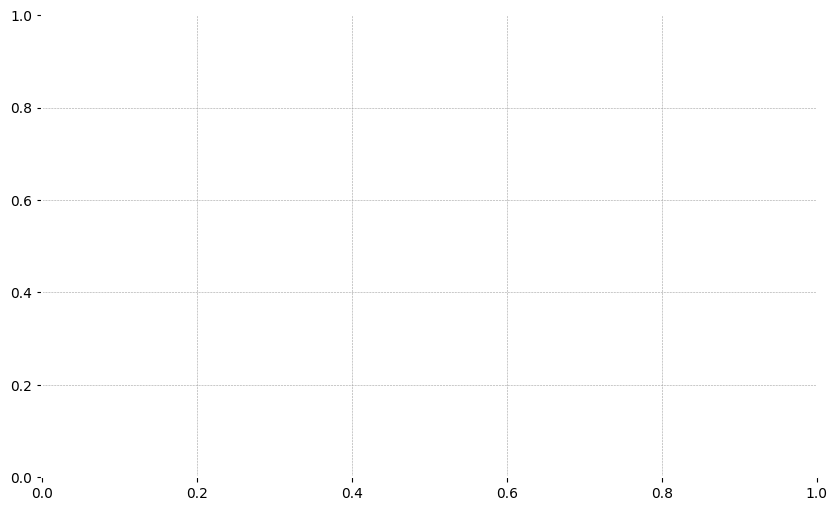

In [ ]:
# Plotting actual vs. predicted values for a specific model
# Choose the model you want to plot from the 'predictions' dictionary
model_to_plot = 'LSTM'  # Replace with the desired model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions[model_to_plot], color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values ({model_to_plot})') # Include model name in title
plt.legend()
plt.show()

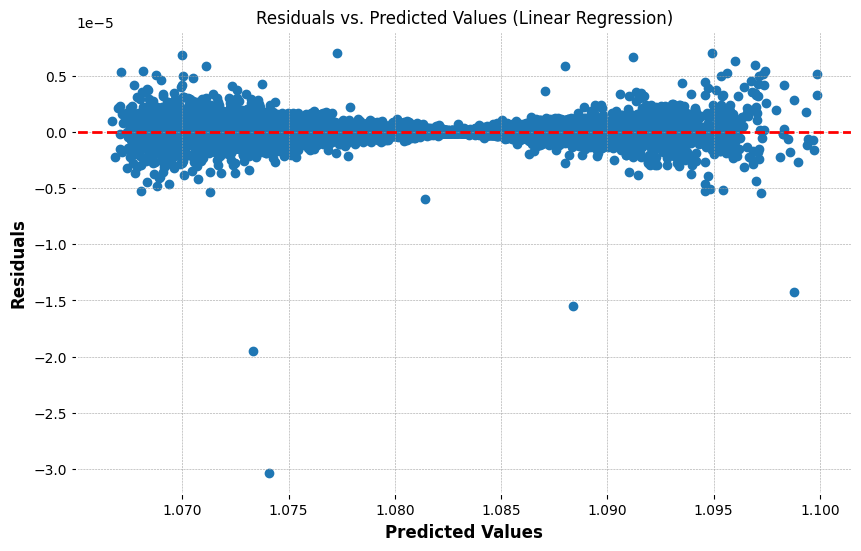

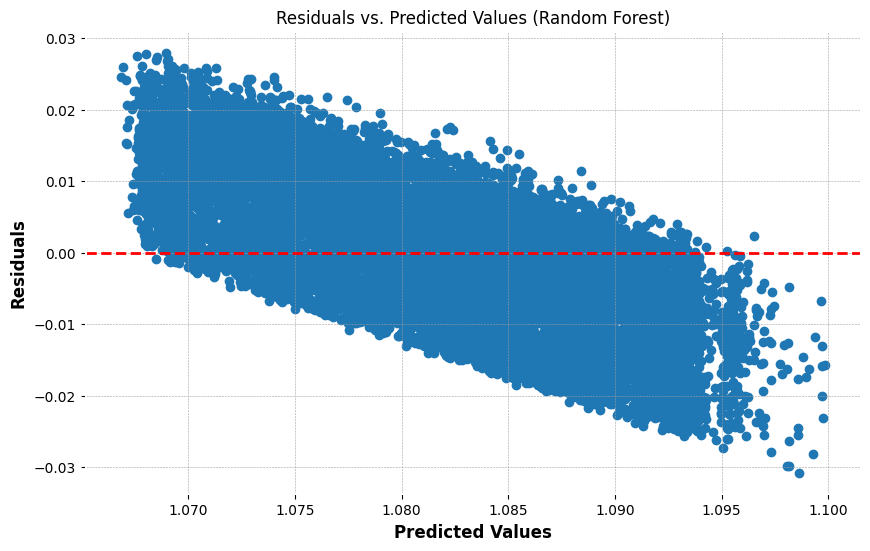

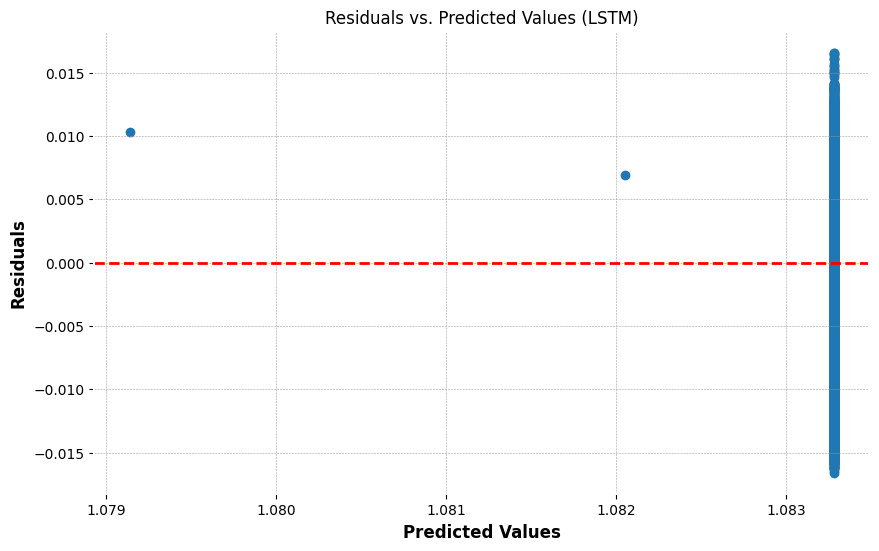

In [ ]:
# Compile all predictions
predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'LSTM': y_pred_lstm.flatten()  # Flatten for compatibility
}

# Plot residuals for each model
for model_name, y_pred in predictions.items():
    # Ensure predictions and y_test have the same length
    min_length = min(len(y_test), len(y_pred))
    residuals = y_test[:min_length] - y_pred[:min_length]

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred[:min_length], residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. Predicted Values ({model_name})')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

In [ ]:
# Compile all predictions
predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'LSTM': y_pred_lstm.flatten()  # Flatten for compatibility
}

# Print performance metrics for comparison
for model_name, preds in predictions.items():
    print(f"{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, preds[:len(y_test)])}") # Slice preds to match y_test length
    print(f"MSE: {mean_squared_error(y_test, preds[:len(y_test)])}")
    print(f"RMSE: {mean_squared_error(y_test, preds[:len(y_test)], squared=False)}")
    print(f"R²: {r2_score(y_test, preds[:len(y_test)])}\n") # Slice preds to match y_test length

Linear Regression Performance:
MAE: 3.2166616022769997e-07
MSE: 4.400289511436988e-13
RMSE: 6.633467804577775e-07
R²: 0.9999999907318848

Random Forest Performance:
MAE: 0.007953293198043937
MSE: 9.592973897642094e-05
RMSE: 0.009794372822004528
R²: -1.0205212908307262

LSTM Performance:
MAE: 0.00575991717990052
MSE: 4.927209955058452e-05
RMSE: 0.007019408775002673
R²: -0.03779419446098231



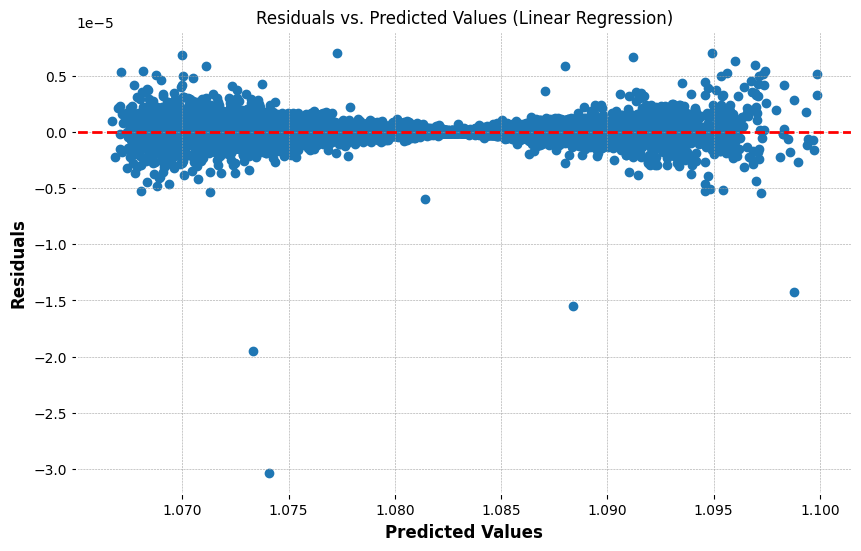

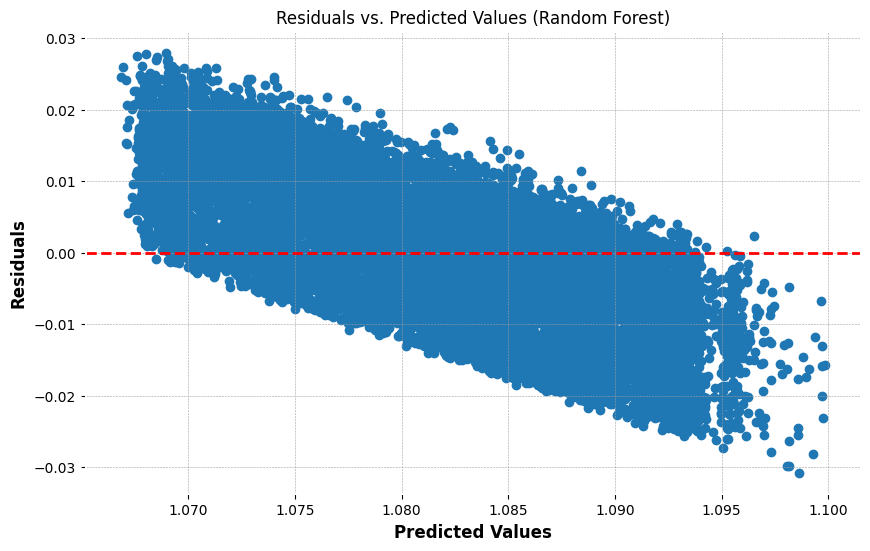

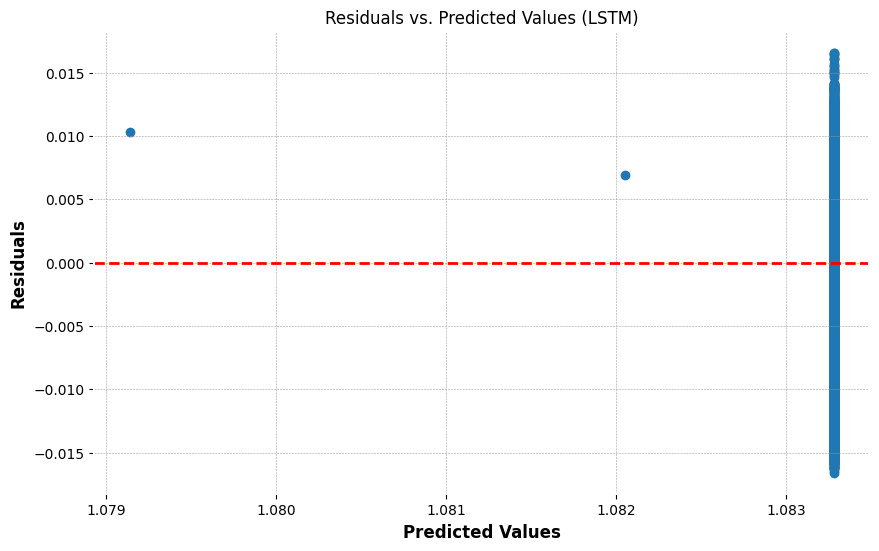

In [ ]:
# Compile all predictions
predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'LSTM': y_pred_lstm.flatten()  # Flatten for compatibility
}

# Plot residuals for each model
for model_name, y_pred in predictions.items():
    # Ensure predictions and y_test have the same length
    min_length = min(len(y_test), len(y_pred))
    residuals = y_test[:min_length] - y_pred[:min_length]  # Slice both arrays to the minimum length

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred[:min_length], residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs. Predicted Values ({model_name})')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()